Borrowed from Tiago's example. Adding how to get table and column information.

In [1]:
from datetime import datetime
import os

import matplotlib.pyplot as plt
import MySQLdb as mdb
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline

In [2]:
def create_connection():
    default_file = os.path.join(os.path.expanduser('~/'), '.atefd.cnf')
    return mdb.connect(read_default_file=default_file, db='EFD')

In [3]:
engine = create_engine('mysql+mysqldb://', creator=create_connection)

In [4]:
tables = pd.read_sql_query('show tables', engine)

In [5]:
tables.head()

,Tables_in_EFD
0,EXA_Summary
1,EXA_commandLog
2,EXA_command_EXAmple
3,EXA_command_SetValue
4,EXA_command_abort


In [6]:
table_name = "atcamera_wrebPower"

In [7]:
columns = pd.read_sql_query('describe {}'.format(table_name), engine)

In [8]:
columns

,Field,Type,Null,Key,Default,Extra
0,date_time,datetime(6),NO,PRI,0000-00-00 00:00:00.000000,
1,private_revCode,char(32),YES,,None,
2,private_sndStamp,double,YES,,None,
3,private_rcvStamp,double,YES,,None,
4,private_seqNum,int(11),YES,,None,
5,private_origin,int(11),YES,,None,
6,private_host,int(11),YES,,None,
7,digital_V,float,YES,,None,
8,digital_I,float,YES,,None,
9,analog_V,float,YES,,None,


In [9]:
data_frame = pd.read_sql_query('select * from {};'.format(table_name), engine)

In [10]:
data_frame.head()

,date_time,private_revCode,private_sndStamp,private_rcvStamp,private_seqNum,private_origin,private_host,digital_V,digital_I,analog_V,...,clkLow_V,clkLow_I,od_V,od_I,dphi_V,dphi_I,heater_V,heater_I,hvbias_V,hvbias_I
0,2018-08-14 18:34:12.274374,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,645.1,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
1,2018-08-14 18:34:12.275449,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.2,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
2,2018-08-14 18:34:12.276372,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.3,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
3,2018-08-14 18:34:12.278053,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.2,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
4,2018-08-14 18:34:12.279707,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.3,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0


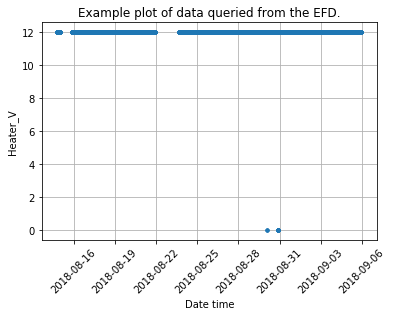

In [11]:
plt.plot(data_frame['date_time'], data_frame['heater_V'], '.')
plt.xticks(rotation=45)
plt.title('Example plot of data queried from the EFD.')
plt.xlabel('Date time')
plt.ylabel('Heater_V')
plt.grid()

In [12]:
b1 = datetime(2018, 9, 4)
b2 = datetime(2018, 9, 5)

In [13]:
query = 'select * from {0} where {0}.date_time between \'{1}\' and \'{2}\';'.format(table_name, b1, b2)

In [14]:
df1 = pd.read_sql_query(query, engine)

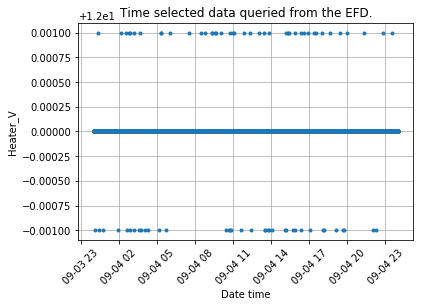

In [15]:
plt.plot(df1['date_time'], df1['heater_V'], '.')
plt.xticks(rotation=45)
plt.title('Time selected data queried from the EFD.')
plt.xlabel('Date time')
plt.ylabel('Heater_V')
plt.grid()